In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None # pour pas avoir erreur quand copie dans colonne df
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import random

# Système isolé

## Nombre états 

In [2]:
B = 1 # Champ magnétique

kB = 1.38e-23

N = 10 # Nombre d'atomes
J = 1
mi = int(2*J+1) # Nombre de projection différentes du moment magnétique

muB = 9e-21 # Magnéton de Bohr

n = mi**N # Nombre d'état possibles
print('Nombre d états possibles :',n)

Nombre d états possibles : 59049


In [70]:
# Création de chaque projection en associant une nombre à chacune
j = np.arange(1,mi+1,1)
s = str()
for i in j:
    s += str(i)
print(s)

123


In [71]:
# Création du dataframe avec tout les combinaisons possibles en considérant les N atomes et mi projections
# Chaque ligne correspond à un micro-état différent
etats = list(product(s, repeat=N))

df = pd.DataFrame({'Etats':etats})

df['Etats'] = [list(df['Etats'][i]) for i in df.index]        
df['Etats'] = [np.array([int(j) for j in df['Etats'][i]]) for i in df.index]
        
print(df)

                                Etats
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
2      [1, 1, 1, 1, 1, 1, 1, 1, 1, 3]
3      [1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
4      [1, 1, 1, 1, 1, 1, 1, 1, 2, 2]
...                               ...
59044  [3, 3, 3, 3, 3, 3, 3, 3, 2, 2]
59045  [3, 3, 3, 3, 3, 3, 3, 3, 2, 3]
59046  [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]
59047  [3, 3, 3, 3, 3, 3, 3, 3, 3, 2]
59048  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

[59049 rows x 1 columns]


## Calcul énergie

><div class="alert alert-block alert-warning"> $$ E_{etat} = -\mu _B B\sum_j m_j $$

In [73]:
# Calcul de l'énergie our chaque micro-état / Ei = -B*mi*muB
df['Ei'] = [-B*sum(df['Etats'][i])*muB for i in df.index]
print(df)

                                Etats            Ei
0      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -9.000000e-20
1      [1, 1, 1, 1, 1, 1, 1, 1, 1, 2] -9.900000e-20
2      [1, 1, 1, 1, 1, 1, 1, 1, 1, 3] -1.080000e-19
3      [1, 1, 1, 1, 1, 1, 1, 1, 2, 1] -9.900000e-20
4      [1, 1, 1, 1, 1, 1, 1, 1, 2, 2] -1.080000e-19
...                               ...           ...
59044  [3, 3, 3, 3, 3, 3, 3, 3, 2, 2] -2.520000e-19
59045  [3, 3, 3, 3, 3, 3, 3, 3, 2, 3] -2.610000e-19
59046  [3, 3, 3, 3, 3, 3, 3, 3, 3, 1] -2.520000e-19
59047  [3, 3, 3, 3, 3, 3, 3, 3, 3, 2] -2.610000e-19
59048  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3] -2.700000e-19

[59049 rows x 2 columns]


In [74]:
Ei_diff = df['Ei'].value_counts() # Nombre de micro-états pour chaque énergie
print(Ei_diff)
nbr_Ei_diff = len(Ei_diff) # Nombre énergies différentes possibles
print(nbr_Ei_diff)

Ei
-1.800000e-19    8953
-1.890000e-19    8350
-1.710000e-19    8350
-1.620000e-19    6765
-1.980000e-19    6765
-1.530000e-19    4740
-2.070000e-19    4740
-1.440000e-19    2850
-2.160000e-19    2850
-1.350000e-19    1452
-2.250000e-19    1452
-1.260000e-19     615
-2.340000e-19     615
-1.170000e-19     210
-2.430000e-19     210
-1.080000e-19      55
-2.520000e-19      55
-2.610000e-19      10
-9.900000e-20      10
-9.000000e-20       1
-2.700000e-19       1
Name: count, dtype: int64
21


## Entropie statistique

><div class="alert alert-block alert-warning"> $$ S_i = -k_B ln\Omega _i $$

In [75]:
# On mets les différentes énergies dans une liste
Ei = []
for i in Ei_diff.index:
    Ei += [i]
Ei.sort() # On trie la liste par ordre croissant

# Calcul de l'entropie pour énergie Ei S = kB*ln(nbre micro-états avec Ei)
# On bouce sur les différentes énergies
S = []
for i in Ei:
    S += [kB*np.log(Ei_diff[i])]

Text(0, 0.5, 'Entropie statistique [J/K]')

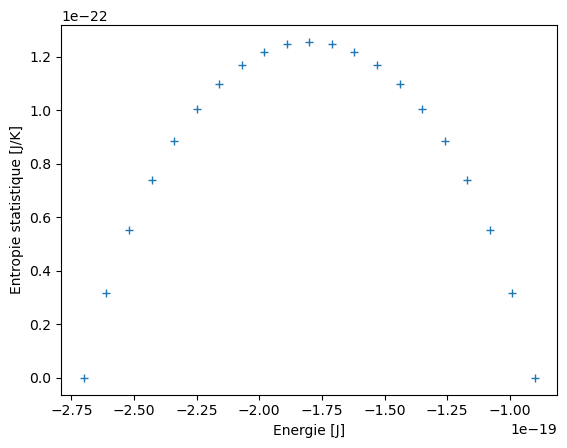

In [76]:
plt.plot(Ei,S,'+')
plt.xlabel('Energie [J]')
plt.ylabel('Entropie statistique [J/K]')

## Température 

><div class="alert alert-block alert-warning"> $$ \frac{1}{T} = \frac{\partial S}{\partial E} $$

C:\Users\Galy_\AppData\Local\Temp\ipykernel_4296\3802955271.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  T += [1/invT]


Text(0, 0.5, 'Température [K]')

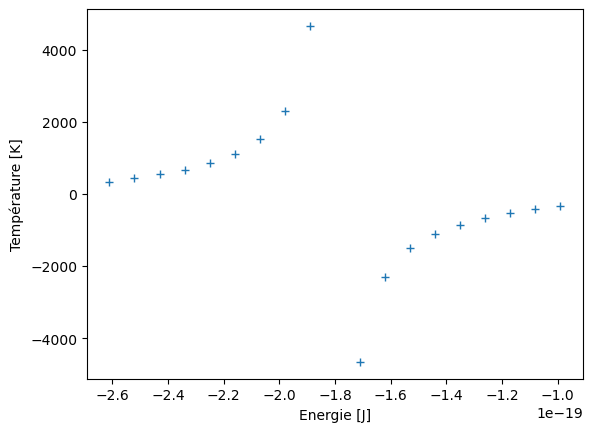

In [77]:
# Cacul de la température schant que 1/T=dS/dE
T = []
for i in range(1,len(Ei)-1):
    invT = (S[i+1]-S[i-1])/(Ei[i+1]-Ei[i-1])
    T += [1/invT]

plt.plot(Ei[1:-1],T,'+')
plt.xlabel('Energie [J]')
plt.ylabel('Température [K]')

In [40]:
# Données récupérées pour N=10

# J = 1
T1 = [3.1470614630670417e+22, 4.2507024026519495e+22, 5.4086547007070984e+22, 6.74385986666432e+22, 8.435092887674079e+22, 1.074528931854594e+23, 1.4244384505879094e+23, 2.0370719647478944e+23, 3.442471112778129e+23, 1.0392477822794957e+24, -1.0392477822794957e+24, -3.442471112778129e+23, -2.0370719647478944e+23, -1.4244384505879094e+23, -1.074528931854594e+23, -8.435092887674079e+22, -6.74385986666432e+22, -5.4086547007070984e+22, -4.2507024026519495e+22, -3.1470614630670417e+22]
E1 = [-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10]

# J = 1/2
T1_2 = [3.1470614630670417e+22, 4.81782176045298e+22, 7.388010491472946e+22, 1.2948842702111907e+23, 3.974503585323956e+23, -3.974503585323956e+23, -1.2948842702111907e+23, -7.388010491472946e+22, -4.81782176045298e+22, -3.1470614630670417e+22]
E1_2 = [-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10]

# J = 3/2
T3_2 = [3.1470614630670417e+22, 4.2507024026519495e+22, 5.2271559452498665e+22, 6.222361228443135e+22, 7.301404280901675e+22, 8.513919862687425e+22, 9.93314538092906e+22, 1.165652983022751e+23, 1.3833756512253652e+23, 1.6725369002454948e+23, 2.0814865999457667e+23, 2.7135483901246587e+23, 3.8378087134717406e+23, 6.438834821871619e+23, 1.9377344019869128e+24, -1.9377344019869128e+24, -6.438834821871619e+23, -3.8378087134717406e+23, -2.7135483901246587e+23, -2.0814865999457667e+23, -1.6725369002454948e+23, -1.3833756512253652e+23, -1.165652983022751e+23, -9.93314538092906e+22, -8.513919862687425e+22, -7.301404280901675e+22, -6.222361228443135e+22, -5.2271559452498665e+22, -4.2507024026519495e+22, -3.1470614630670417e+22]
E3_2 = [-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10]


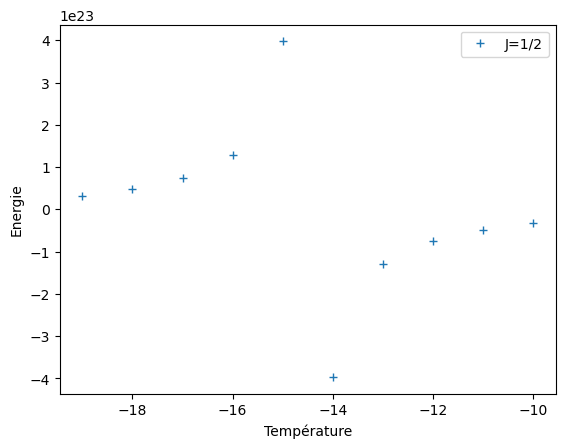

In [41]:
# Tracé de la température en donction de l'énergie
#plt.plot(E1[1:],T1,'+',label='J=1')
plt.plot(E1_2[1:],T1_2,'+',label='J=1/2')
#plt.plot(E3_2[1:],T3_2,'+',label='J=3/2')
plt.xlabel('Température')
plt.ylabel('Energie')
plt.legend()
plt.show()

# Système thermostaté

## Pour une température 

In [50]:
i = 8
T_th = T[i] # on fixe une température
E_th = Ei[i+1] # énergie assosciée

print('Température du thermostat : Tth =', np.round(T_th),'K')
print('Energie associée à cette température : E =',E_th,'J')

kB = 1.38e-23
Beta = 1/(kB*T_th)


Température du thermostat : Tth = 4655.0 K
Energie associée à cette température : E = -1.89e-19 J


><div class="alert alert-block alert-warning">  Probabilité $P_i$ pour que l'atome du système soit sur le niveau d'énergie $E_i$ : $$ P_i = \frac{N_i}{N}=\frac{e^{-\beta E_i}}{\sum_i e^{-\beta E_i}} $$ avec $$\beta = \frac{1}{k_BT}$$

In [51]:
J = 1
mi = 2*J+1

df_ = pd.DataFrame({'mi' : np.arange(1,mi+1,1)}) # Tableau avec les différents 'sous-états' possibles pour un atome

df_['Ei'] = [-df_['mi'][i]*B*muB for i in df_.index] # Energie de chaque 'sous état'

df_['Beta*Ei'] = [Beta*df_['Ei'][i] for i in df_.index]

df_['exp(-Beta*Ei)'] = [np.exp(-df_['Beta*Ei'][i]) for i in df_.index]

# Fonction de partition
zi = sum(df_['exp(-Beta*Ei)'])

df_['Pi'] = [df_['exp(-Beta*Ei)'][i]/zi for i in df_.index] # Proba de chaque sous-état

df_ = df_.sort_values(by = 'Pi') # on trie le dataframe par ordre croissant de proba

# Colonne où pour chaque ligne on sommme la proba Pi d'un sous-état avec celle des sous-état précédents
# La dernière est égale à 1 car on a sommé toutes les probas
df_['sum(Pi)'] = [0 for i in df_.index]
for i in df_.index:
    if i==0:
        df_['sum(Pi)'][i] = df_['Pi'][i]
    else :
        df_['sum(Pi)'][i] = df_['Pi'][i]+df_['sum(Pi)'][i-1]

df_['Pi*Ei'] = [df_['Pi'][i]*df_['Ei'][i] for i in df_.index]

# finalement on obtient un dataframe avec pour les différents sous-états considérés, les probas, énergie et autres associés
print(df_)

   mi            Ei   Beta*Ei  exp(-Beta*Ei)        Pi   sum(Pi)         Pi*Ei
0   1 -9.000000e-21 -0.140113       1.150404  0.287866  0.287866 -2.590798e-21
1   2 -1.800000e-20 -0.280226       1.323429  0.331163  0.619029 -5.960928e-21
2   3 -2.700000e-20 -0.420340       1.522479  0.380971  1.000000 -1.028621e-20


In [59]:
# Fonction qui créée aléatoirement un micro-état en considérant N atomes pouvant être chacun dans n'importe quel sous-état mi

def crea_etats(N):
    # Création d'une liste correspondant à la colonne sum(Pi)
    sum_Pi = []
    for i in df_.index:
        if i == 0:
            sum_Pi += [df_['Pi'][i]]
        else :
            sum_Pi += [df_['Pi'][i]+sum_Pi[-1]]
    
    pi = []
    en = []
    
    for i in range(0,N):
        x = random.random() # tire un nombre aléatoire entre 0 et 1 qui va nous permettre d'associer aléatoirement un sous-état à l'atome i 
        d = []
        
        # On compare ce nombre avec les différentes valeurs de la liste sum_Pi en la parcourant
        for j in sum_Pi: 
            if j < x: # si x > l'élément j de la liste sum_Pi
                d += [] # d reste vide
                en += []
            else : # sinon
                d += [j] # on ajoute l'élément à la liste d

        et = d[0] # on récupère seulement le premier élément de la liste car c'est celui qui nous intéresse car il correspond au sous-état dans lequel est l'atome        
        
        # on associé la proba et l'énergie que l'atome i a d'être dans ce sous-état
        for h in df_.index:
            if et == df_['sum(Pi)'][h]: # pour cela on compare et au valeurs de la colonne sum(Pi) du dataframe avec les sous-états possibles
                pi += [df_['Pi'][h]] # proba associée 
                en += [df_['Ei'][h]/muB] # énergie associée 
                
    # On boucle la procédure pour les N atomes et on obtient 2 listes 
    # pi : avec la probas de chaque atomes d'être dans un sous-état aléatoirement tiré
    # en : avec l'énergie de chaque atomes associée à la proba qu'il soit dans le sous-état éléatoirement tiré
    return pi, en

In [62]:
N = 10 # Nombre d'atomes
M = 10000 # Nombre d'états différents qu'on veut créer

df_etats = pd.DataFrame(index=range(0,M)) # Création dataframe avec M états

df_etats['Et_Pi'] = [crea_etats(N)[0] for i in df_etats.index] # Colonnes avec les probas de chaque atome pour tous les états
df_etats['Et_Ei'] = [crea_etats(N)[1] for i in df_etats.index] # Colonnes avec les énergies de chaque atome pour tous les états

df_etats['Energie'] = [sum(df_etats['Et_Ei'][i])*muB for i in df_etats.index]  # Cacul de l'énergie de chaque état en sommant les énergies de chaque atomes de l'état

print(df_etats)

                                                  Et_Pi  \
0     [0.331162689045763, 0.331162689045763, 0.33116...   
1     [0.331162689045763, 0.331162689045763, 0.33116...   
2     [0.3809708897425428, 0.331162689045763, 0.3809...   
3     [0.331162689045763, 0.331162689045763, 0.33116...   
4     [0.331162689045763, 0.3809708897425428, 0.2878...   
...                                                 ...   
9995  [0.3809708897425428, 0.331162689045763, 0.2878...   
9996  [0.331162689045763, 0.3809708897425428, 0.2878...   
9997  [0.3809708897425428, 0.3809708897425428, 0.380...   
9998  [0.3809708897425428, 0.2878664212116942, 0.331...   
9999  [0.2878664212116942, 0.331162689045763, 0.3311...   

                                                  Et_Ei       Energie  
0     [-2.0, -3.0, -3.0, -1.0, -3.0, -3.0, -2.0, -3.... -2.160000e-19  
1     [-3.0, -1.0, -2.0, -2.0, -1.0, -3.0, -1.0, -3.... -1.800000e-19  
2     [-3.0, -2.0, -2.0, -3.0, -1.0, -2.0, -2.0, -3.... -2.160000e-19  
3  

Energie
-1.890000e-19    1556
-1.980000e-19    1414
-1.800000e-19    1378
-1.710000e-19    1170
-2.070000e-19    1142
-2.160000e-19     813
-1.620000e-19     773
-1.530000e-19     523
-2.250000e-19     468
-1.440000e-19     257
-2.340000e-19     223
-1.350000e-19      99
-2.430000e-19      92
-2.520000e-19      35
-1.260000e-19      33
-1.170000e-19      15
-1.080000e-19       5
-2.610000e-19       4
Name: count, dtype: int64


Text(0, 0.5, 'Nombre d etats')

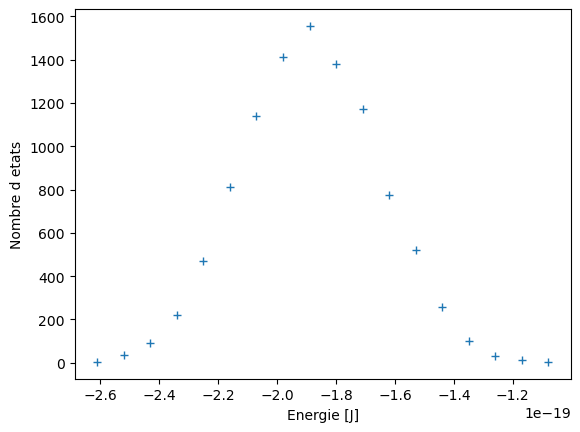

In [67]:
Energie_etats = df_etats['Energie'].value_counts() # Nombre états pour chaque énergie
print(Energie_etats)
plt.plot(Energie_etats,'+')
plt.xlabel('Energie [J]')
plt.ylabel('Nombre d etats')

In [68]:
# Affichage du max de la courbe précédente qui correspond bien à l'énergie qu'on a calculé dans le cas du système isolé pour cette température de thermostat
print('Energie correspondant au maximum de la courbe précédente : E =',Energie_etats.idxmax(),'J') 

Energie correspondant au maximum de la courbe précédente : E = -1.89e-19 J
